In [124]:
# import packages
import data_utils as du
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import preprocessing.transform_data as td
import numpy as np

sns.set(rc={'figure.figsize':(13,13)})


## Distribution analysis

c:\Users\buim\Anaconda3\envs\mod_5\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


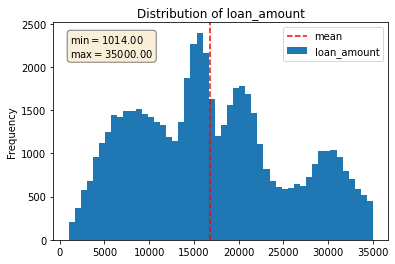

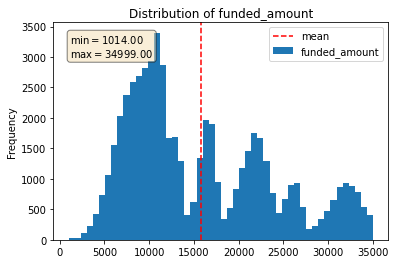

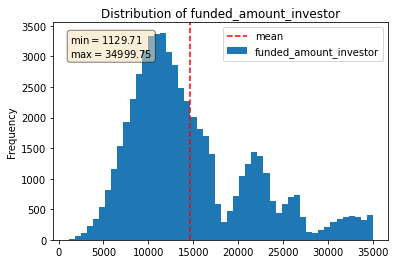

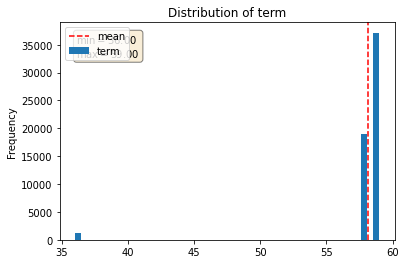

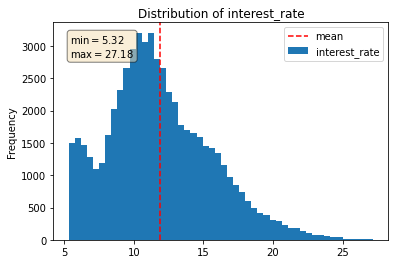

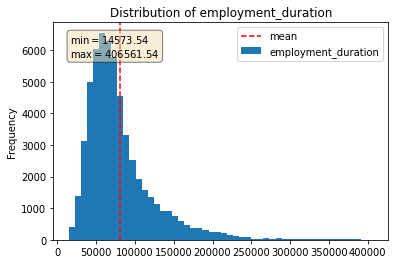

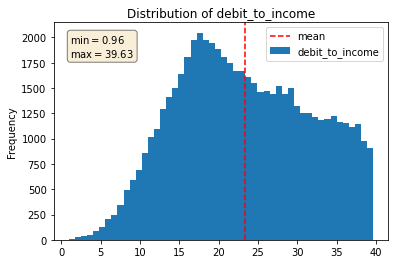

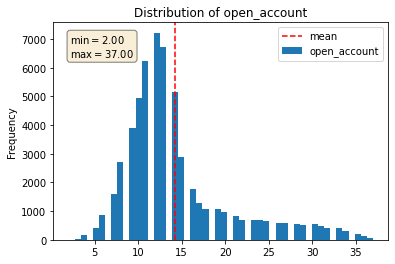

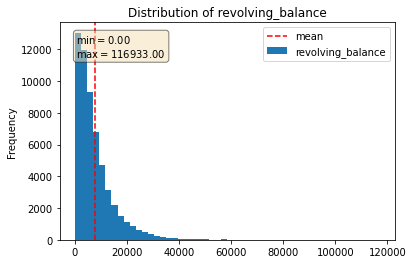

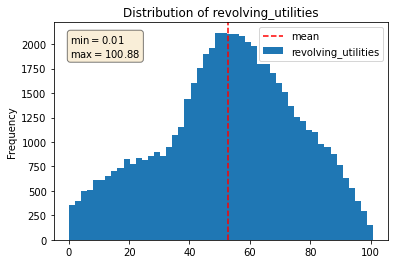

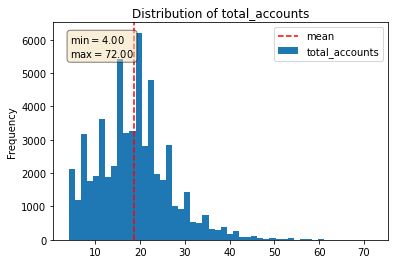

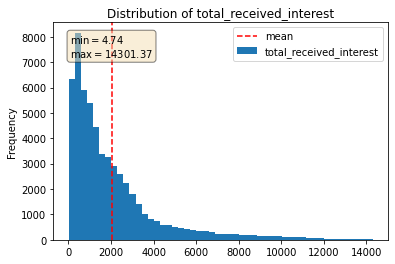

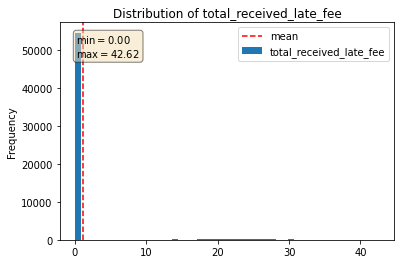

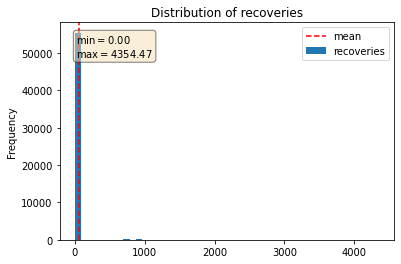

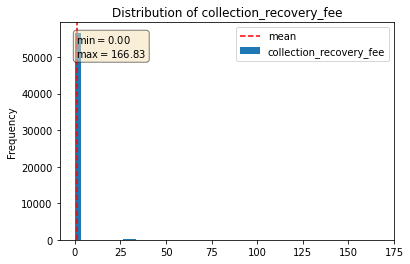

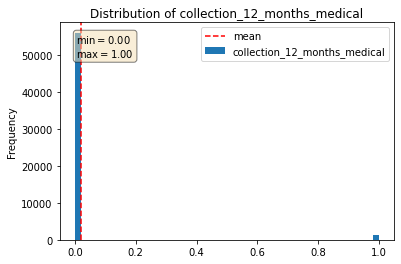

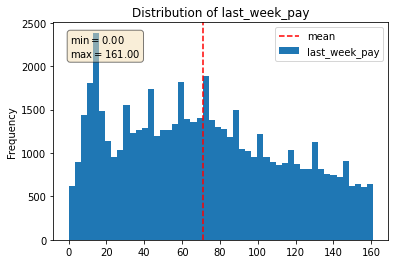

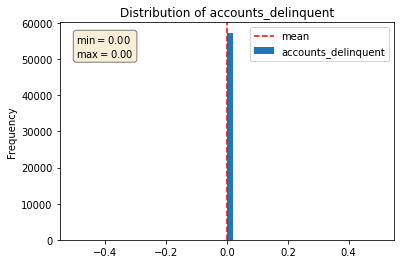

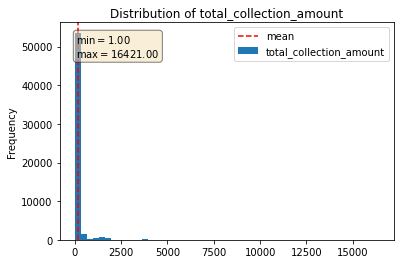

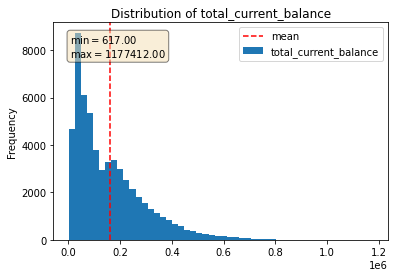

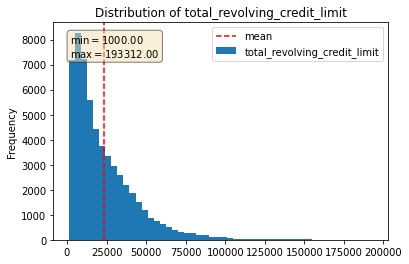

In [60]:

def distribution_graph(df, column):
    fig, ax = plt.subplots()    
    ax = df[column].plot.hist(title="Distribution of " +  column, label=column, bins = 50)

    mean_value= df[column].mean()
    
    min_value = df[column].min()
    max_value = df[column].max()
    textstr = '\n'.join((
        r'$\min=%.2f$' % (min_value, ),
        r'$\max=%.2f$' % (max_value, )))
    
    # define matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

    # Plotting the mean value on the distribution against the density.
    plt.axvline(x=mean_value, color='r', linestyle='--', label="mean")
    ax.legend()
    plt.savefig(os.path.join( du.current_file_dir(), paths['filepaths']['output'] , "distribution/" + column + ".png"))


#load config files
paths_file = os.path.join(du.current_file_dir(), 'configuration_files\\filepaths.json')
with open(paths_file) as f:
    paths = json.load(f)

# load in train data
train_df_original = du.load_data(os.path.join(du.current_file_dir(), paths['filepaths']['training_data']))

# get list of numerical variables
ref_file = du.load_data(os.path.join(du.current_file_dir(), paths['filepaths']['reference_data']))

# format column names
train_df = td.format_column_names(train_df, ref_file)


#produce distribution graphs 
for col in ref_file[ref_file.variable_type.isin(['con','dis', 'discrete'])]['variable_name']:
        distribution_graph(train_df, col)


In [151]:
# columns with no variation
pd.Series({col: len(pd.unique(train_df_processed[col])) for col in train_df_processed}).sort_values().head(15)


accounts_delinquent              1
payment_plan                     1
loan_status                      2
application_type                 2
collection_12_months_medical     2
initial_list_status              2
term                             3
home_ownership                   3
verification_status              3
public_record                    5
inquires_six_months              6
grade                            7
delinquency_two_years            9
sub_grade                       35
open_account                    36
dtype: int64

## Batch enrollment

In [62]:
# batch enrollment analysis - are all batch numbers present in train set available in the test set?
training_data_bat = train_df_original["Batch Enrolled"].unique()
test_data_bat = du.load_data(os.path.join(du.current_file_dir(), paths['filepaths']['training_data']))["Batch Enrolled"].unique()

# test to see if same batch numbers are present in both datasets - this will tell us whether we should keep the variable in or not
set(training_data_bat).issubset(test_data_bat)


True

<AxesSubplot:xlabel='Percent', ylabel='batch_enrolled'>

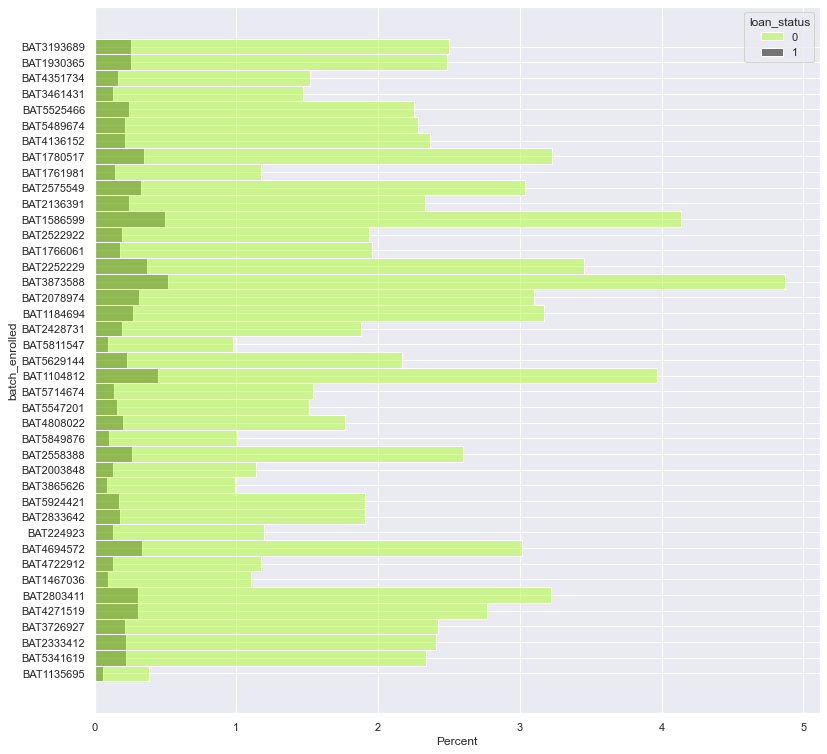

In [150]:
sns.histplot(data= df, y= 'batch_enrolled', stat= 'percent', hue= 'loan_status', palette= ['greenyellow', 'black'])


## Loan status

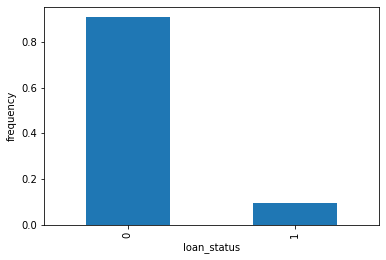

In [88]:
fig, ax = plt.subplots()
train_df.loan_status.value_counts(normalize= True).plot(ax=ax, kind='bar', xlabel='loan_status', ylabel='frequency')

plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

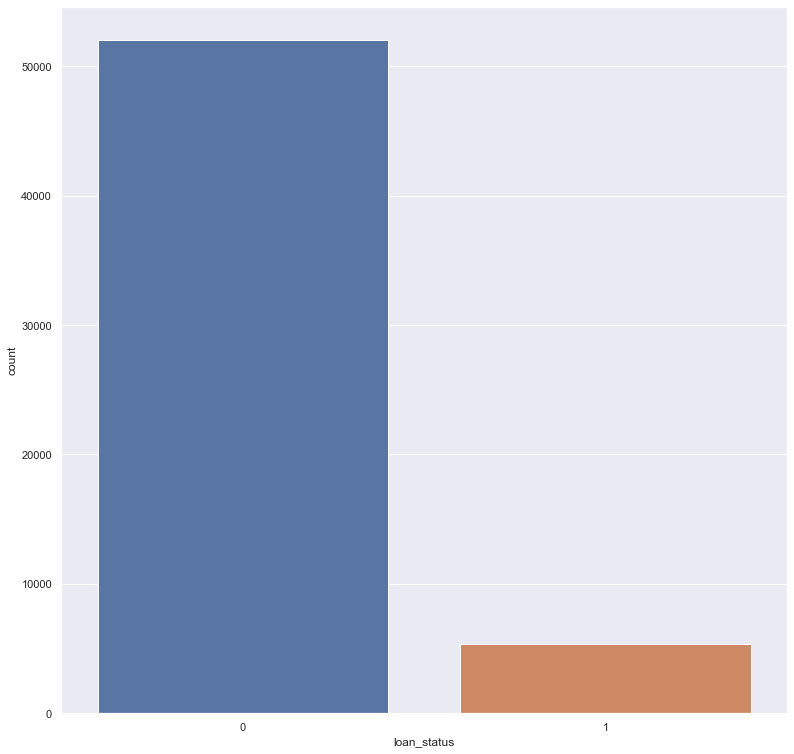

In [153]:
sns.countplot(data=train_df, x= 'loan_status')


## Grade and subgrade
Loan grading - the process of assigning a quality score to a loan application to identify a risk of default.

<AxesSubplot:xlabel='grade', ylabel='Percent'>

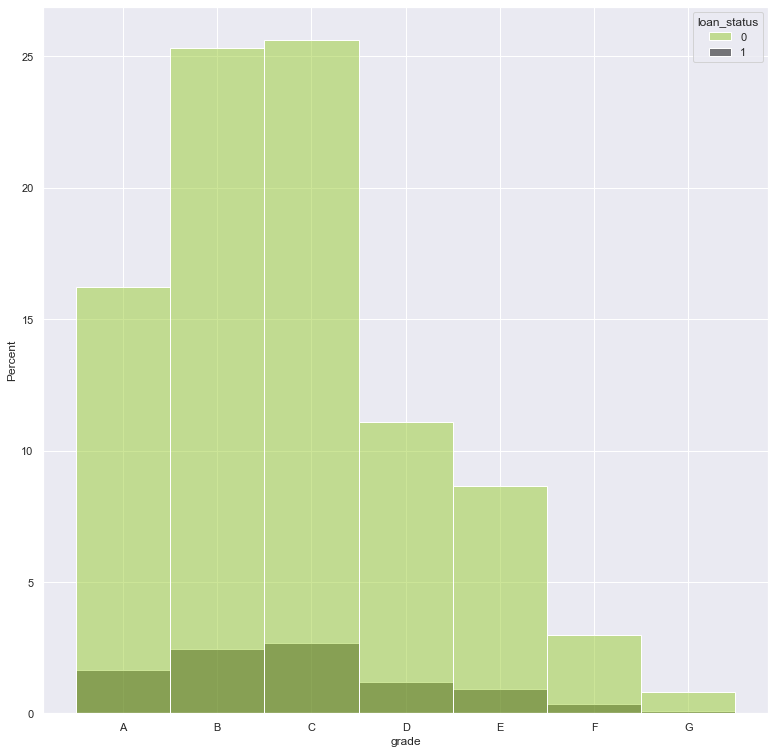

In [125]:
# Grade 
sns.histplot(train_df.sort_values(by= 'grade'), x= 'grade', hue= 'loan_status', stat= 'percent', palette= ['yellowgreen', 'black'])


<AxesSubplot:xlabel='sub_grade', ylabel='Percent'>

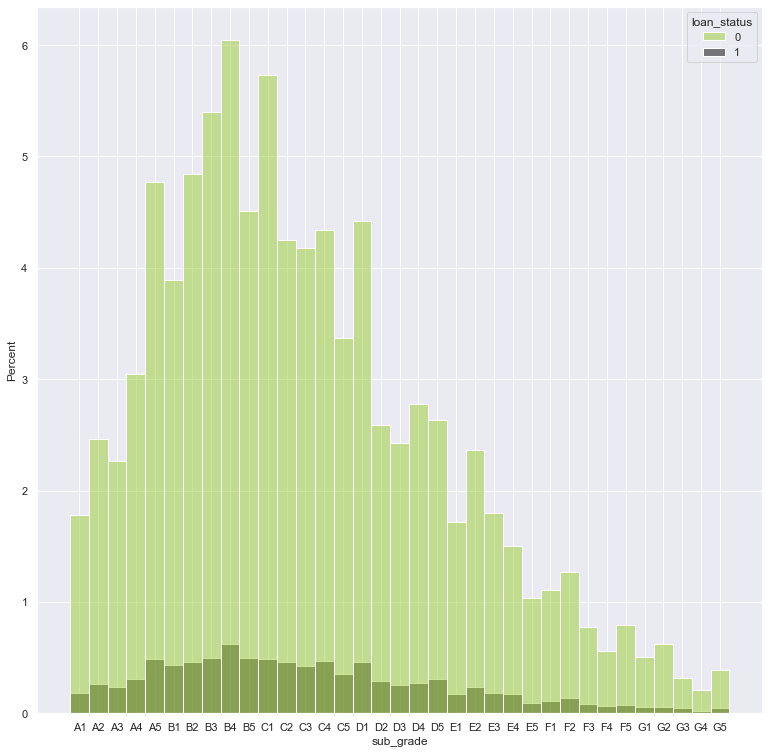

In [127]:
sns.histplot(train_df.sort_values(by= 'sub_grade'), x= 'sub_grade', hue= 'loan_status', stat= 'percent', palette= ['yellowgreen', 'black'])


In [132]:
train_df.groupby("grade")["sub_grade"].unique().reset_index().rename(columns = {"sub_grade": "associated_subgrades"})
# grade and subgrade not clearly associated

,grade,associated_subgrades
0,A,"[D2, F2, C3, D4, C1, C5, A5, B3, E3, C2, A3, B..."
1,B,"[D5, D1, B4, F2, D4, E4, C4, A5, C2, B1, E5, A..."
2,C,"[A5, B1, G2, E2, D5, A2, D4, C3, C2, B3, C4, A..."
3,D,"[D1, C1, F2, C2, A5, B2, D5, G3, A4, C4, B3, B..."
4,E,"[E1, E2, B5, D2, C2, A2, B4, A5, G2, B1, C1, B..."
5,F,"[B2, D5, C1, D1, B4, A4, G2, F4, F1, E3, D4, C..."
6,G,"[B2, B4, E2, D2, C1, C3, D3, E3, B1, F1, F2, C..."


[(10.0, 13.204301548250006)]

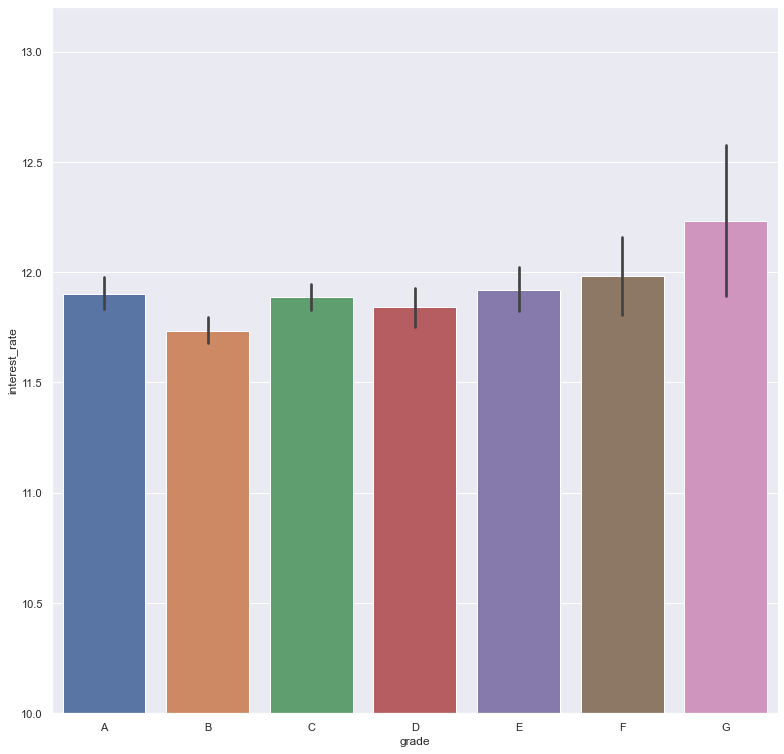

In [141]:
# comparison with interest rate
g = sns.barplot(data =train_df.sort_values("grade"), x= 'grade', y= 'interest_rate')
g.set(ylim=(10, None))

[(11.0, 13.529050203325658)]

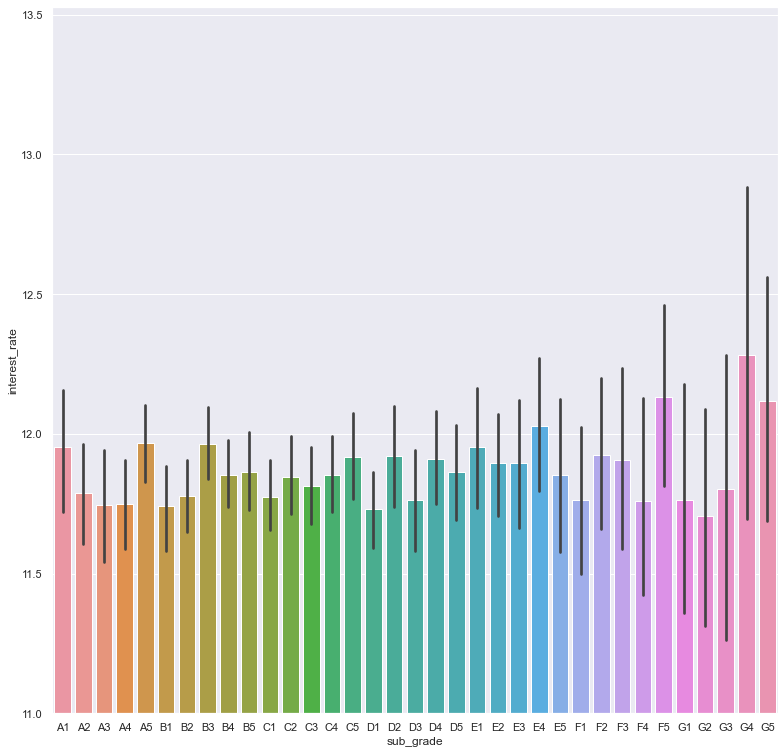

In [143]:
g = sns.barplot(data =train_df.sort_values("sub_grade"), x= 'sub_grade', y= 'interest_rate')
g.set(ylim=(11, None))

[(15000.0, 17656.67967918251)]

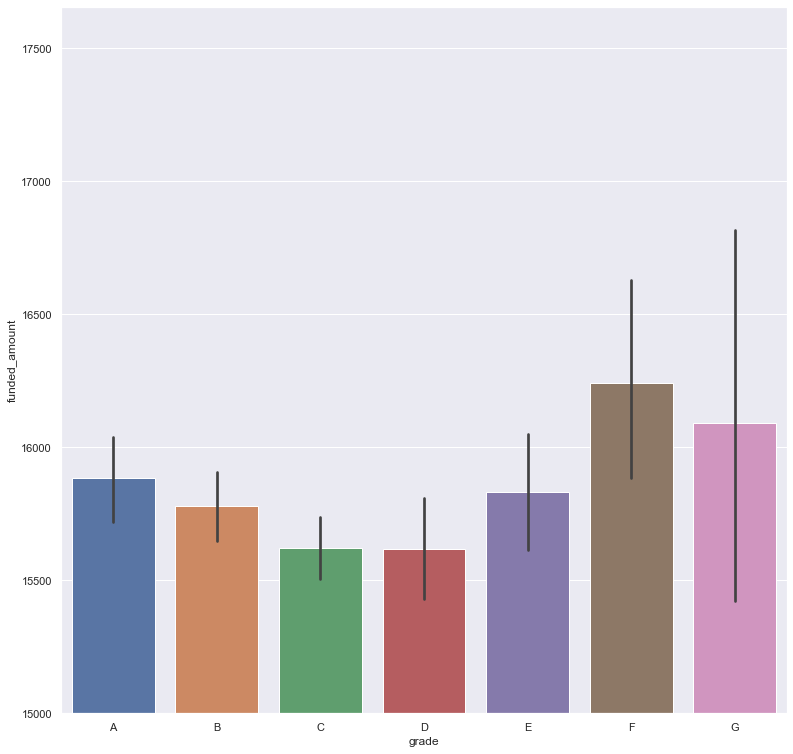

In [166]:
# comparison with funded amount
g = sns.barplot(data =train_df.sort_values("grade"), x= 'grade', y= 'funded_amount')
g.set(ylim=(15000, None))

[(15000.0, 18197.58221590909)]

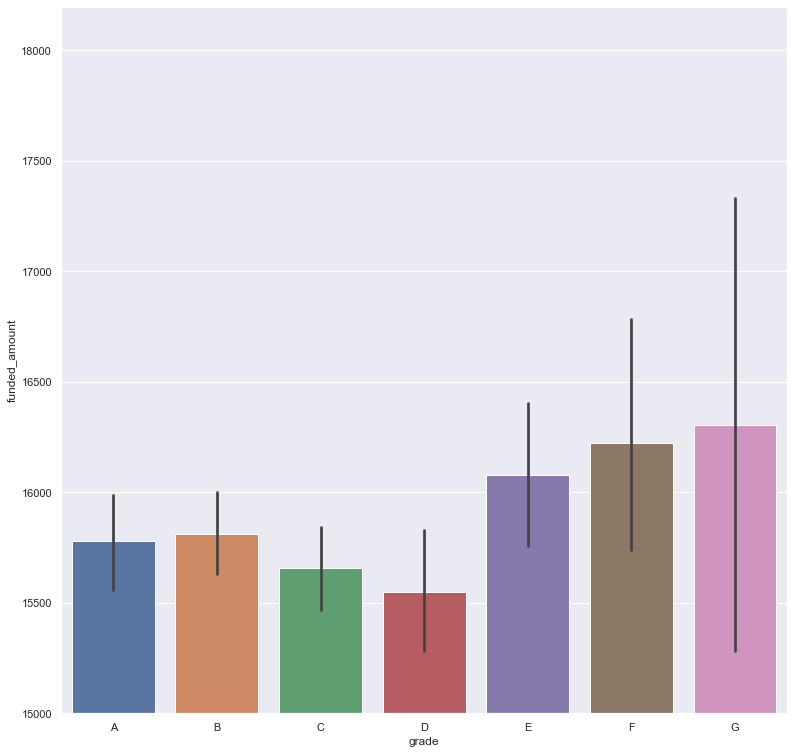

In [168]:
# filtering to the same type of loan
g = sns.barplot(data =train_df.query("loan_title=='Credit card refinancing'").sort_values("grade"), x= 'grade', y= 'funded_amount')
g.set(ylim=(15000, None))

[(15000.0, 18594.484934210523)]

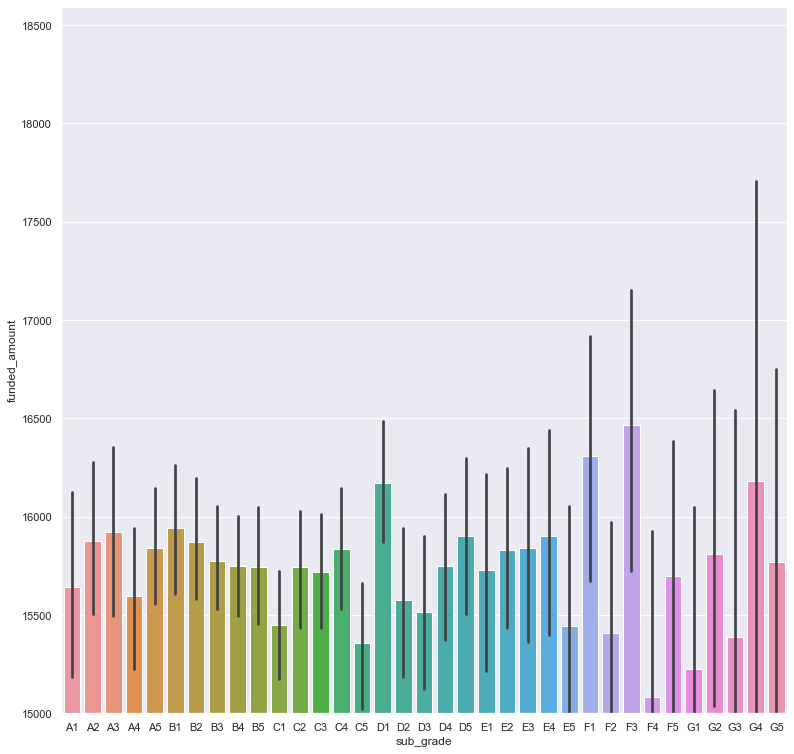

In [165]:
g = sns.barplot(data =train_df.sort_values("sub_grade"), x= 'sub_grade', y= 'funded_amount')
g.set(ylim=(15000, None))

[(10000.0, 18687.34397727273)]

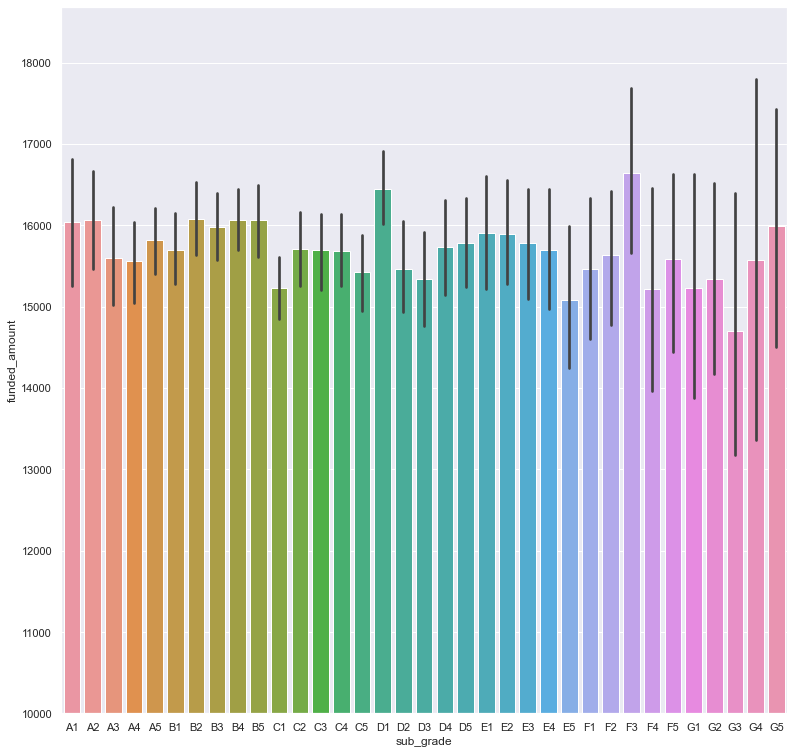

In [172]:
g = sns.barplot(data =train_df.query("loan_title=='Credit card refinancing'").sort_values("sub_grade"), x= 'sub_grade', y= 'funded_amount')
g.set(ylim=(10000, None))


[(20.0, 26.406768420963644)]

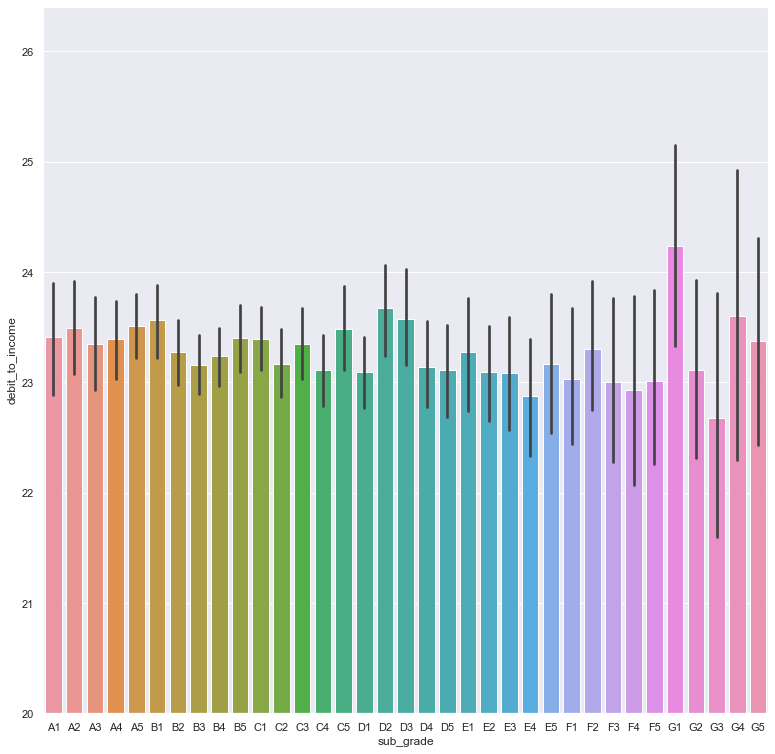

In [176]:
# comparing with debit to income
g = sns.barplot(data =train_df.sort_values("sub_grade"), x= 'sub_grade', y= 'debit_to_income')
g.set(ylim=(20, None))

## Loan title

<AxesSubplot:xlabel='Percent', ylabel='loan_title'>

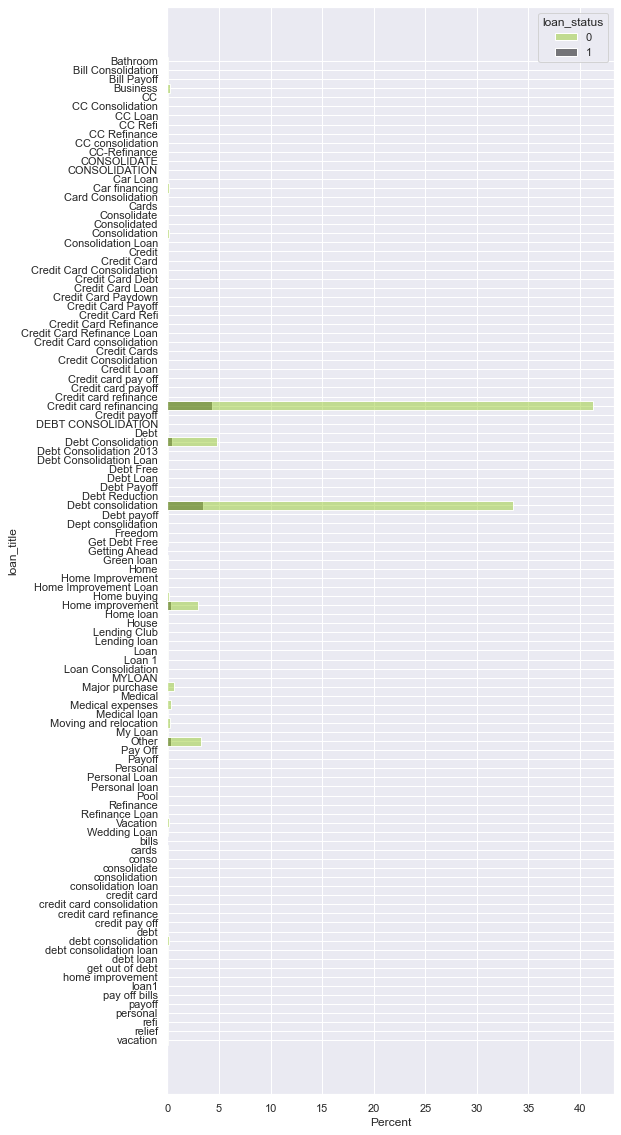

In [157]:
fig = plt.gcf()

fig.set_size_inches(8, 20)

sns.histplot(train_df.sort_values(by= 'loan_title'), y= 'loan_title', hue= 'loan_status', stat= 'percent', palette= ['yellowgreen', 'black'])


<AxesSubplot:xlabel='interest_rate', ylabel='loan_title'>

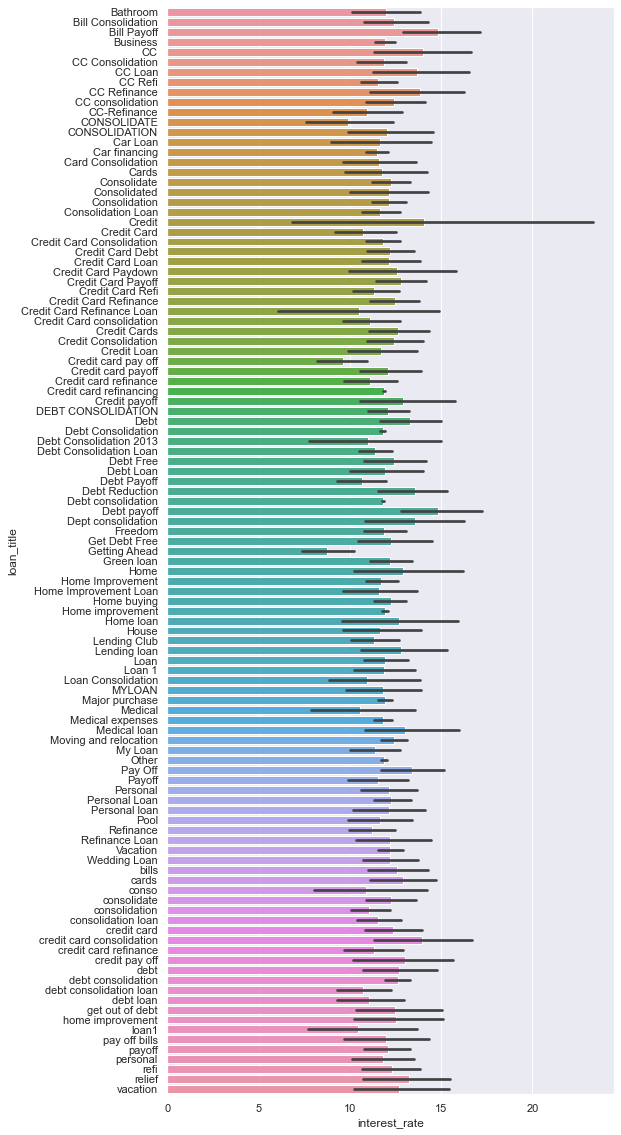

In [161]:
# comare with debt to income ratio
fig = plt.gcf()

fig.set_size_inches(8, 20)
sns.barplot(data =train_df.sort_values("loan_title"), x= 'interest_rate', y= 'loan_title')


<AxesSubplot:xlabel='funded_amount', ylabel='loan_title'>

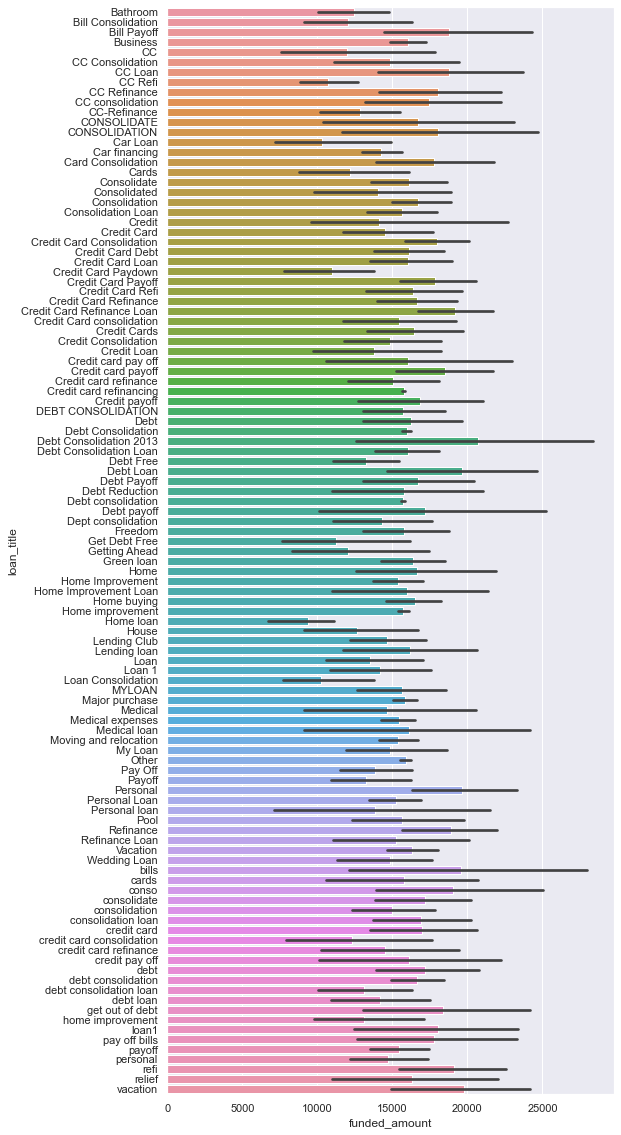

In [162]:
# comare with debt to income ratio
fig = plt.gcf()

fig.set_size_inches(8, 20)
sns.barplot(data =train_df.sort_values("loan_title"), x= 'funded_amount', y= 'loan_title')


<AxesSubplot:xlabel='term', ylabel='loan_title'>

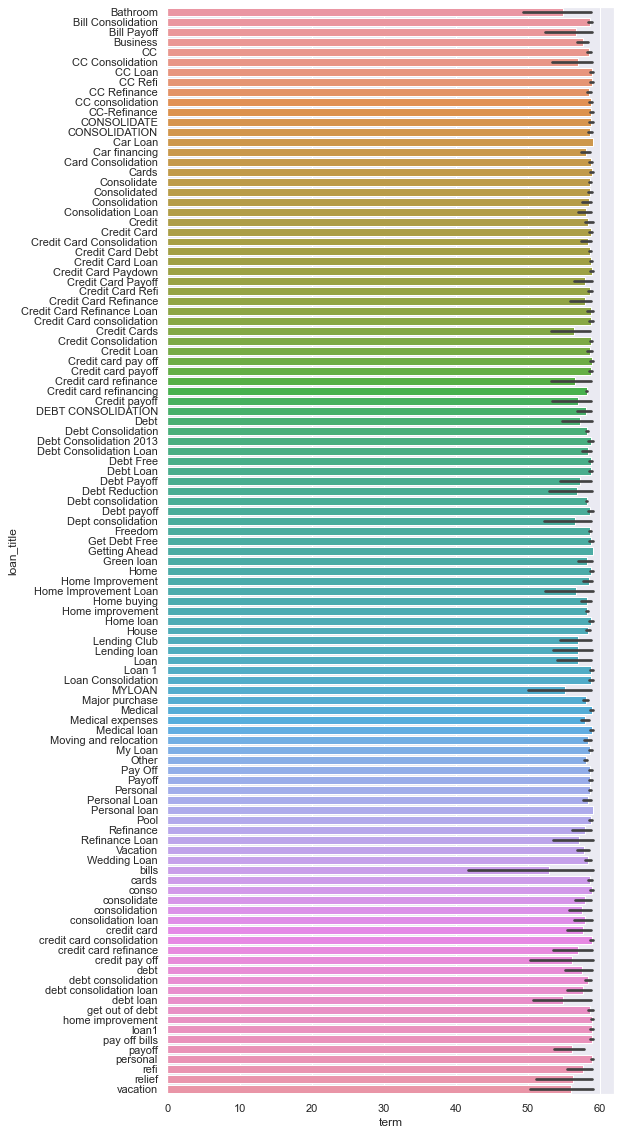

In [163]:
fig = plt.gcf()

fig.set_size_inches(8, 20)
sns.barplot(data =train_df.sort_values("loan_title"), x= 'term', y= 'loan_title')

## correlation heatmap

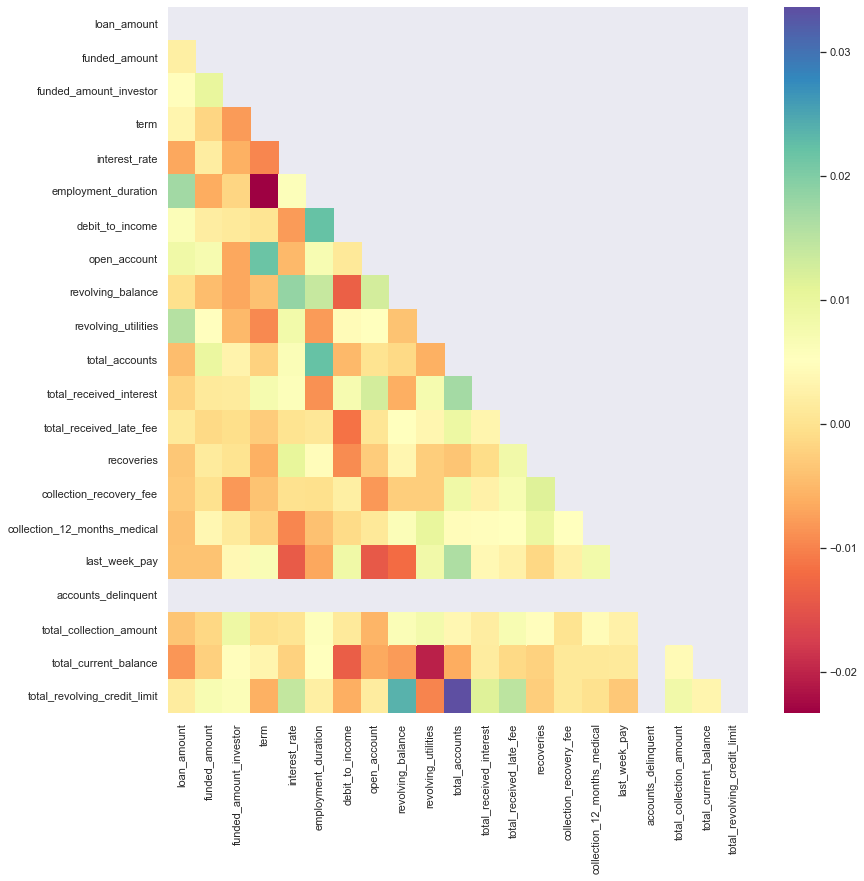

In [129]:
import seaborn as sns

original_cols = ref_file.variable_name[0:-1]
num_cols = ref_file[ref_file.variable_type.isin(['con', 'dis', 'discrete'])]['variable_name'].tolist()

corr_df = train_df[num_cols].corr()

mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)

hmap = sns.heatmap(corr_df, mask=mask_ut, cmap="Spectral")
hmap.figure.savefig(os.path.join( du.current_file_dir(), paths['filepaths']['output'] ,  "correlation_heat_map.png"))
